In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
import linAlgVis

# <font face="gotham" color="purple"> Basis </font>

**Basis**, denoted as $B$, is the minimum unit of user-customization of coordinates, which is any type of coordinate system other than Cartesian.

## <font face="gotham" color="purple"> Basis of $\mathbb{R}^2$ </font>

Formally speaking, the basis is a set of vectors $B$ in vector space $V$ with two conditions:
1. All vectors in $B$ are independent. 
2. $\text{span}(B)=V$

We have seen _standard basis_ in earlier chapters, for instance in $\mathbb{R}^2$

$$e_1=
\left[
\begin{matrix}
1\\0
\end{matrix}
\right],
\ e_2=\left[
\begin{matrix}
0\\1
\end{matrix}
\right]
$$

and in $\mathbb{R}^3$

$$e_1=
\left[
\begin{matrix}
1\\0\\0
\end{matrix}
\right],
\ e_2=\left[
\begin{matrix}
0\\1\\0
\end{matrix}
\right],
\ e_3=\left[
\begin{matrix}
0\\0\\1
\end{matrix}
\right]
$$

Here we show the linear combination of standard basis for vector $(3, 6)$

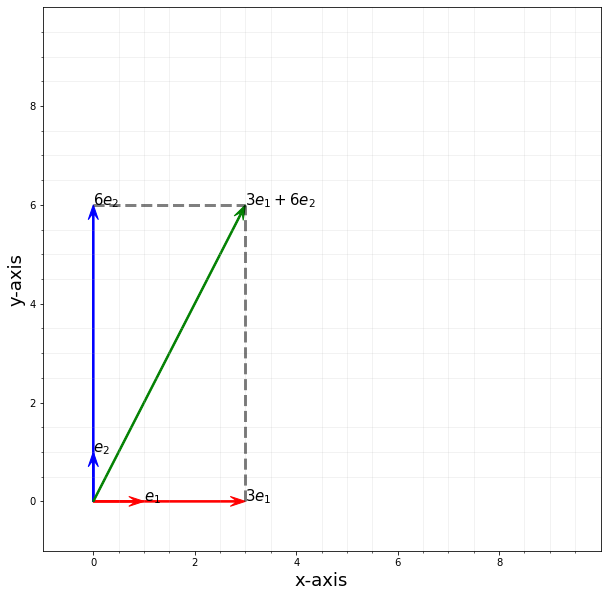

In [3]:
fig, ax = plt.subplots(figsize = (10, 10))

arrows = np.array([[[0,0,1,0]],
                  [[0,0,0,1]],
                  [[0,0,3,0]],
                  [[0,0,0,6]],
                  [[0,0,3,6]]])

colors = ['r','b','r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0], V[0], color = colors[i], width = .03, 
             length_includes_head = True,
             head_width = .2, # default: 3*width
             head_length = .3,
             overhang = .4)

############################Dashed##################################
line1 = np.array([[3, 0], [3, 6]])
ax.plot(line1[:,0], line1[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

line2 = np.array([[0, 6], [3, 6]])
ax.plot(line2[:,0], line2[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

############################Text#####################################

ax.text(0, 1, '$e_2$', size = 15)
ax.text(1, 0, '$e_1$', size = 15)

ax.text(0, 6, '$6e_2$', size = 15)
ax.text(3, 0, '$3e_1$', size = 15)

ax.text(3, 6, '$3e_1+6e_2$', size = 15)

###########################Grid Setting##############################
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 10, 2)
minor_ticks = np.arange(0, 10, .5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

#######################################################################
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.axis([-1, 10, -1, 10])
ax.grid()
plt.show()

But non-standard basis is what we mostly use, we can show that $(2, 1)$ and $(-1, 2)$ is a basis for $\mathbb{R}^2$.

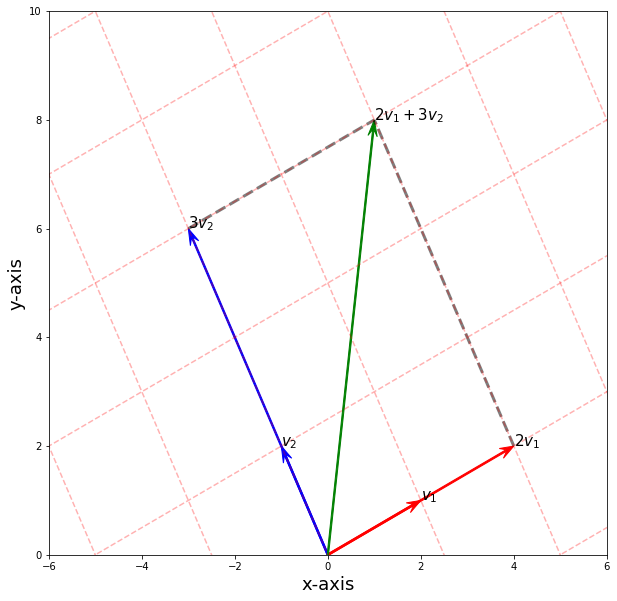

In [4]:
fig, ax = plt.subplots(figsize = (10, 10))

v1 = np.array([2, 1])
v2 = np.array([-1, 2])
v1m2 = 2*v1
v2m3 = 3*v2

arrows = np.array([[[0, 0, v1[0], v1[1]]],
               [[0, 0, v2[0], v2[1]]],
               [[0, 0, 2*v1[0], 2*v1[1]]],
               [[0, 0, 3*v2[0], 3*v2[1]]],
               [[0, 0, (v1m2+v2m3)[0],(v1m2+v2m3)[1]]]])

colors = ['r','b','r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0], V[0], color = colors[i], width = .03, 
             length_includes_head = True,
             head_width = .2, # default: 3*width
             head_length = .3,
             overhang = .4)

# ############################ Dashed ##################################

point1 = [v2m3[0], v2m3[1]]
point2 = [v2m3[0]+v1m2[0], v2m3[1]+v1m2[1]]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

point1 = [v1m2[0], v1m2[1]]
point2 = [v2m3[0]+v1m2[0], v2m3[1]+v1m2[1]]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

############################Text#####################################

ax.text(2, 1, '$v_1$', size = 15)
ax.text(-1, 2, '$v_2$', size = 15)

ax.text(v1m2[0],v1m2[1], '$2v_1$', size = 15)
ax.text(v2m3[0],v2m3[1], '$3v_2$', size = 15)

ax.text(v1m2[0]+v2m3[0],v1m2[1]+v2m3[1], '$2v_1+3v_2$', size = 15)
############################## Grid ###############################

t = np.linspace(-6, 6)
for k in range(-6, 7):
    x = 2*k - t
    y = k + 2*t
    ax.plot(x, y, ls = '--', color = 'red', alpha = .3)

for k in range(-6, 7):
    x = -k+2*t
    y = 2*k+t
    ax.plot(x, y, ls = '--', color = 'red', alpha = .3)

#######################################################################
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.axis([-6,6, 0, 10]) # np.linalg.norm(v1m2+v2m3) is intercept
plt.show()

Whether basis is standard or not, as long as they are independent, they span $\mathbb{R}^2$.

## <font face="gotham" color="purple"> Basis of $\mathbb{R}^3$</font>

Next we show the standard basis and a non-standard basis of $\mathbb{R}^3$.

The standard basis in $\mathbb{R}^3$ is 

$$
(e_1, e_2, e_3)=
\left[
\begin{matrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{matrix}
\right]
$$

and we can show a vector $(2,3,4)$ in $\mathbb{R}^3$ is a linear combination of them. We did a 3D linear combination plot in lecture 6, here we just reproduce it by importing the module at the top of the note.

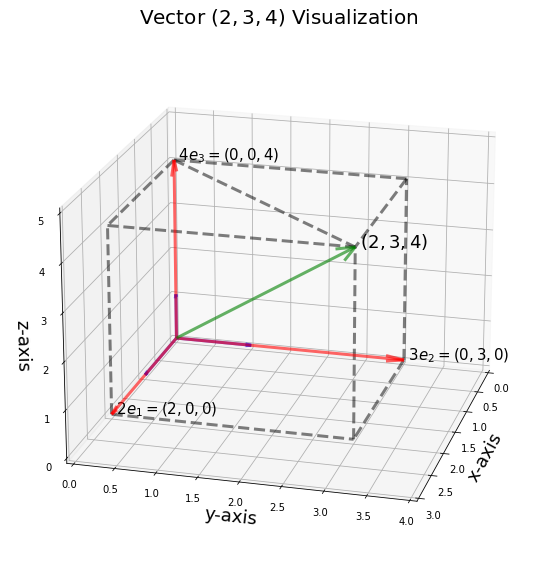

In [5]:
linAlgVis.linearCombo(2,3,4)

Next we show the linear combination of a non-standard basis, $(2,1,0), (0,3,1), (0,0,3)$. I also wrote another function ```linearComboNonStd``` in the ```linAlgVis``` module.

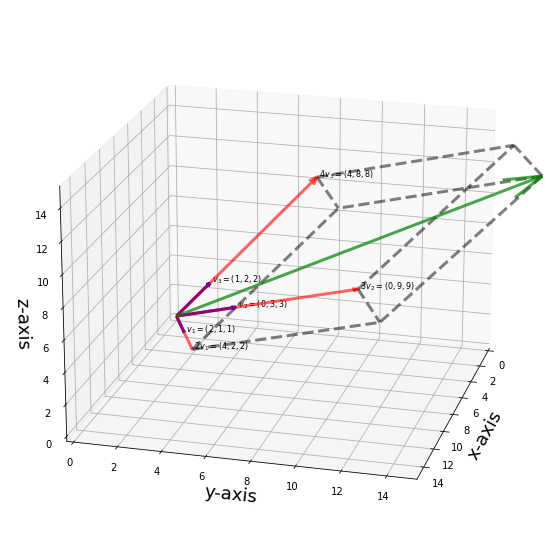

In [6]:
a, b, c = 2, 3, 4
vec1 = np.array([2,1,0])
vec2 = np.array([0,3,1])
vec3 = np.array([1,2,3])
linAlgVis.linearComboNonStd(2,3,4, vec1, vec2, vec3)

# <font face="gotham" color="purple"> Dimension</font>

If $B$ is the basis for $V$, then the **number of vectors** in $B$ is the **dimension** of $V$, denoted as $\text{dim}(V)$.

<font size = 3 face="gotham"> Theorem 1</font>

Let $B$ be the basis of $V$, $B$ has $n$ vectors, and $T$ is a set of vectors in $V$, if $T$ has $p$ vectors that $p>n$, then $T$ must be linearly dependent.

<font size = 3 face="gotham"> Theorem 2</font>

If $B$ and $T$ both are bases of $V$ then $B$ and $T$ must have the same number of vectors which is the $\text{dim}(V)$.

<font size = 3 face="gotham"> Theorem 3</font>

$\text{dim}(V) = n$ and $S$ is a set of vectors from $V$ with $n$ linearly independent vectors, then $\text{span}(S)=V$.

<font size = 3 face="gotham" > Theorem 4</font>

Let $v_1, v_2, ...,v_n$ be a set of vectors in the vector space $V$ and let $W = \text{span}\{v_1,v_2,...,v_n\}$. If $v_n$ is a linear combination of $v_1, v_2,...v_{n-1}$, then $W = \text{span}\{v_1,v_2,...,v_{n-1}\}$ 

These theorems are self-explanatory, no need to memorize, the best way to understand them is visualize them in your mind with $\mathbb{R}^3$.

# <font face="gotham" color="purple"> Column Space</font>

Columns space of a matrix is denoted as $\text{Col}A$, which is the space spanned by all columns of a matrix.

 <font size = 4 face="gotham" color="purple">Important Fact </font>

Row operations will not change the dependence of the columns of a matrix.

Let's say we have a matrix $A$

In [26]:
A = sy.Matrix([[1, -2, -1, 3, 0], [-2, 4, 5, -5, 3], [3, -6, -6, 8, 2]]);
print(A)

Matrix([[1, -2, -1, 3, 0], [-2, 4, 5, -5, 3], [3, -6, -6, 8, 2]])


Perform ```rref``` operations, and dependence of $\text{Col}A$ reserved.

In [27]:
A.rref()
print(A.rref())

(Matrix([
[1, -2, 0, 10/3, 0],
[0,  0, 1,  1/3, 0],
[0,  0, 0,    0, 1]]), (0, 2, 4))


The $2nd$ and the $4th$ column are the linear combination of other vectors, it is safe remove them without tampering the column space. Therefore the $\text{Col}A$ is 

In [9]:
ColA = sy.Matrix([[1, -1,  0], [-2,  5,  3], [3, -6, 2]]); 
print(ColA)

Matrix([[1, -1, 0], [-2, 5, 3], [3, -6, 2]])


## <font face="gotham" color="purple"> Column Spaces Aren't the Same</font>

Did you notice there was a catch when we say the dependency of $\text{Col}A$ was not affect by row operations, however we did not say the column spaces are the same as before and after the row operations.

Actually, they can never be the same. 

Consider the matrix $A$:

In [10]:
A = sy.Matrix([[3, -1, -1],[2, 4, 4], [-1, 1, 1]]); A

⎡3   -1  -1⎤
⎢          ⎥
⎢2   4   4 ⎥
⎢          ⎥
⎣-1  1   1 ⎦

If we perform ```rref```, $A$ is turned into $B$. Apparently the column space of them are different apparently.

In [11]:
B = A.rref(); B
print(B)

(Matrix([
[1, 0, 0],
[0, 1, 1],
[0, 0, 0]]), (0, 1))


Now list the basis of their column spaces: are $\text{Col}A$ and $\text{Col}B$ the same?

$$
\text{col}(A)=\text{span}\left\{\left[ \matrix{3\cr 2\cr -1}\right],\ \left[\matrix{-1\cr 4\cr 1}\right]\right\}
$$
$$
\text{col}(B)=\text{span}\left\{\left[ \matrix{1\cr 0\cr 0}\right],\ \left[\matrix{0\cr 1\cr 0}\right]\right\}
$$

It's easy to visualize them, they are two intersecting planes.

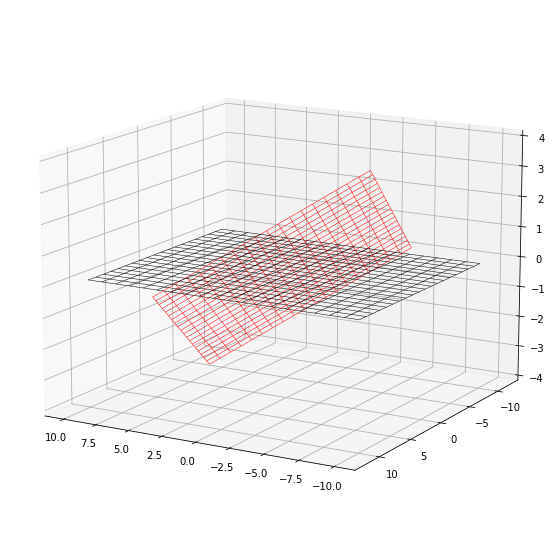

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)

X = 3*S - T
Y = 2*S + 4*T
Z = -S + T
ax.plot_wireframe(X, Y, Z, linewidth = .5, color = 'r')

s = np.linspace(-10, 10, 20)
t = np.linspace(-10, 10, 20)
S, T = np.meshgrid(s, t)
X = S
Y = T
Z = np.zeros(S.shape)
ax.plot_wireframe(X, Y, Z, linewidth = .5, color = 'k')
ax.view_init(elev=14, azim=120)

## <font face="gotham" color="purple"> Method for Finding Basis of $\mathbb{R}^n$</font>

Consider matrix $A_{4\times 2}$, find a basis for $\mathbb{R}^4$.

Note that we only have two column vectors, not possible to span $\mathbb{R}^4$. The common method is to use another two standard basis vectors joined with $A$ to form the basis of $\mathbb{R}^4$.

In [13]:
A = sy.randMatrix(4, 2);A
print(A)

Matrix([[78, 47], [47, 72], [90, 58], [71, 68]])


In [14]:
I = sy.eye(4);I

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

Concatenate the matrix horizontally.

In [15]:
Aug = A.row_join(I);Aug# concatenate 
print(Aug)

Matrix([[78, 47, 1, 0, 0, 0], [47, 72, 0, 1, 0, 0], [90, 58, 0, 0, 1, 0], [71, 68, 0, 0, 0, 1]])


In [16]:
Aug.rref()
print(Aug.rref())

(Matrix([
[1, 0, 0, 0,  34/1001,   -29/1001],
[0, 1, 0, 0, -71/2002,    45/1001],
[0, 0, 1, 0, -281/286,     21/143],
[0, 0, 0, 1, 958/1001, -1877/1001]]), (0, 1, 2, 3))


Therefore the first 4 columns of augmented matrix is a basis.

In [17]:
Aug[:,0:4]
print(Aug[:,0:4])

Matrix([[78, 47, 1, 0], [47, 72, 0, 1], [90, 58, 0, 0], [71, 68, 0, 0]])


# <font face="gotham" color="purple"> Change of Basis</font>

Change of basis is for changing the coordinate system,e.g. from Cartesian to other system.

## <font face="gotham" color="purple"> Coordinate Vector</font>

We have a basis $B=\{b_1, b_2\}$, and $B$'s **coordinate vector** is denoted as $\big[v\big]_B$. If

$$
b_1 = \left[\begin{matrix}1\\1 \end{matrix}\right]\\
b_2 = \left[\begin{matrix}-2\\1 \end{matrix}\right]\\
\big[v\big]_B = \left[\begin{matrix}2\\3 \end{matrix}\right]
$$

Then compute $v$ by using the basis and its coordinate vectors. We want to convert the $\big[v\big]_B$ into a pair of Cartesian coordinates.

In [18]:
P = sy.Matrix([[1,-2],[1,1]]); P
print(P)

Matrix([[1, -2], [1, 1]])


In [19]:
v_B = sy.Matrix([[2], [3]]); v_B
print(v_B)


Matrix([[2], [3]])


In [20]:
P*v_B
print(P*v_B)

Matrix([[-4], [5]])


Now we have successfully converted  $\big[v\big]_B$  into Cartesian

On the other way around, what if we know $v$ i.e. the Cartesian coordinates, and we want to find out $\big[v\big]_B$, for instance 

$$
v = \left[\begin{matrix}-1\\-4 \end{matrix}\right]
$$

Then we can formulate the question as:

$$
\left[\begin{matrix}1 & -2\\1 & 1\end{matrix}\right]
\left[\begin{matrix}b_1\\b_2 \end{matrix}\right]=
\left[\begin{matrix}-1\\-4 \end{matrix}\right]
$$

Just solve the linear system

In [28]:
Aug = sy.Matrix([[1,-2,-1],[1,1,-4]])
print(Aug.rref())

(Matrix([
[1, 0, -3],
[0, 1, -1]]), (0, 1))


We get $\big[v\big]_B = (-3, -1)^T$.

## <font face="gotham" color="purple"> Change of Basis</font>

Most probably we would like to change coordinates from  $\big[v\big]_B$ to  $\big[v\big]_C$, which both aren't Cartesian coordinates.

Say we have two bases $B=\{b_1,\ b_2\}$, $C=\{c_1,\ c_2\}$ in $\mathbb{R}^2$.

$$
b_1=
\left[\begin{matrix}2\\1 \end{matrix}\right],\quad
b_2 = 
\left[\begin{matrix}-1\\1 \end{matrix}\right]\\
c_1=
\left[\begin{matrix}1\\1 \end{matrix}\right],\quad
c_2 = 
\left[\begin{matrix}-3\\1 \end{matrix}\right]\\
$$

We would like to change $\big[v\big]_B$ to $\big[v\big]_C$. Formally this is reformulated as finding **transition matrix** $P_{C\leftarrow B}$.

First we find coordinate vectors for $b_1$ and $b_2$ in $C: b_1 = xc_1+yc_2$, $b_2 = xc_1+yc_2$.

$$
\left[\begin{matrix}2\\1 \end{matrix}\right] = x\left[\begin{matrix}1\\1 \end{matrix}\right]+y\left[\begin{matrix}-3\\1 \end{matrix}\right]= \left[\begin{matrix}1 & -3\\1 &1 \end{matrix}\right]\left[\begin{matrix}x \\y \end{matrix}\right]\\
\left[\begin{matrix}-1\\1 \end{matrix}\right] = x\left[\begin{matrix}1\\1 \end{matrix}\right]+y\left[\begin{matrix}-3\\1 \end{matrix}\right]=\left[\begin{matrix}1 & -3\\1 &1 \end{matrix}\right]\left[\begin{matrix}x \\y \end{matrix}\right]\\
$$

Extract augmented matrix for both system:

$$
\left[\begin{matrix}1 & -3 & 2\\1 &1 &1 \end{matrix}\right]\\
\left[\begin{matrix}1 & -3 & -1\\1 &1 &1 \end{matrix}\right]
$$

They can be combined into one augmented matrix $[C|B]$

$$
\left[\begin{matrix}1 & -3  & 2 & -1\\1 &1 &1 &1 \end{matrix}\right]
$$

In [29]:
Aug = sy.Matrix([[1,-3,2,-1],[1, 1, 1, 1]])
print(Aug.rref())

(Matrix([
[1, 0,  5/4, 1/2],
[0, 1, -1/4, 1/2]]), (0, 1))


The last two columns of rref augmented matrix is the $P_{C\leftarrow B}$.

In general, we can find transition matrix by using

$$[\ C\ |\ B\ ]\longrightarrow [\ I\ |\ P_{C\leftarrow B}\ ]$$

### <font face="gotham" color="purple"> An Example</font>

Let 

$$
B=\left\{\left[\begin{array}{l}
1 \\
1 \\
0
\end{array}\right],\left[\begin{array}{l}
0 \\
1 \\
1
\end{array}\right],\left[\begin{array}{l}
0 \\
1 \\
0
\end{array}\right]\right\} \quad \text { and } \quad C=\left\{\left[\begin{array}{l}
1 \\
1 \\
2
\end{array}\right],\left[\begin{array}{l}
2 \\
1 \\
1
\end{array}\right],\left[\begin{array}{l}
1 \\
0 \\
1
\end{array}\right]\right\}
$$

be two bases for $\mathbb{R}^3$, find the $P_{C\leftarrow B}$ and given $\big[v\big]_B = (1,-1,2)$, find $\big[v\big]_C$.

Construct augmented matrix:

In [23]:
v_B =  sy.Matrix([1, -1, 2])
B = sy.Matrix([[1, 0, 0], [1, 1 ,1], [0, 1, 0]])
C = sy.Matrix([[1, 2, 1], [1, 1 ,0], [2, 1, 1]])
Aug = C.row_join(B); Aug# concatenate 
print(Aug)

Matrix([[1, 2, 1, 1, 0, 0], [1, 1, 0, 1, 1, 1], [2, 1, 1, 0, 1, 0]])


The RHS block of rref is $P_{C\leftarrow B}$ as we have shown above.

In [24]:
Aug_rref = Aug.rref();Aug_rref
print(Aug_rref)


(Matrix([
[1, 0, 0,  0,  1,  1/2],
[0, 1, 0,  1,  0,  1/2],
[0, 0, 1, -1, -1, -3/2]]), (0, 1, 2))


In [25]:
v_C = Aug_rref[0][:,3:6]*v_B; v_C
print(Aug_rref[0][:,3:6])
print(v_B)
print(v_C)

Matrix([[0, 1, 1/2], [1, 0, 1/2], [-1, -1, -3/2]])
Matrix([[1], [-1], [2]])
Matrix([[0], [2], [-3]])


The $\big[v\big]_C$ is $(0, 2, -3)$.